In [112]:
import pandas as pd
pd.set_option('display.max_columns', None)

# 1. Tiền xử lý dữ liệu

In [113]:
data_train = pd.read_csv("./fraudTrain.csv")
data_train = data_train.drop('Unnamed: 0', axis=1)

In [114]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [115]:
data_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [116]:
data_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## 1.1. Kiểm tra giá trị null

In [117]:
data_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## 1.2. Kiểm tra giá trị ngoại lai

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

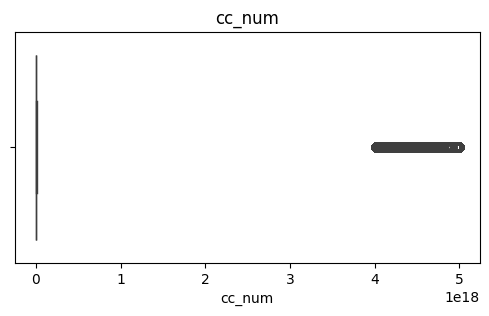

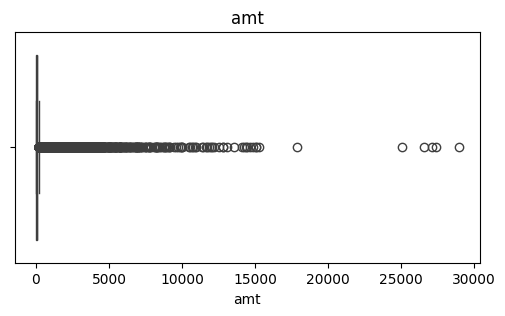

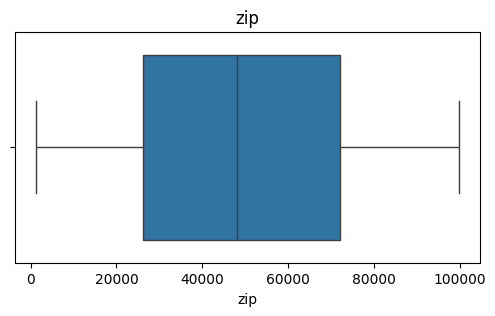

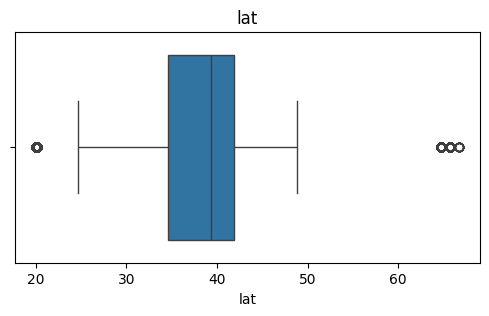

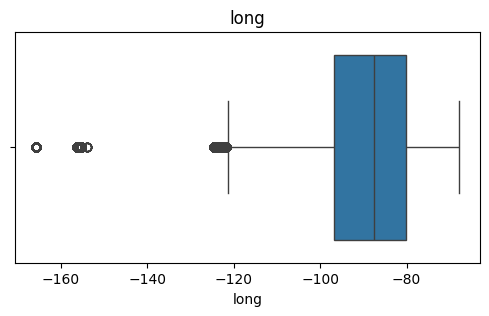

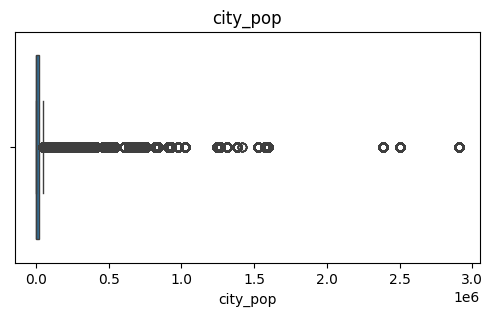

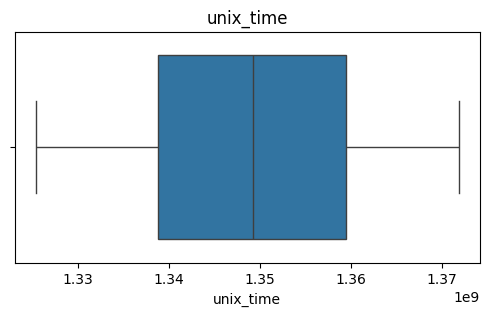

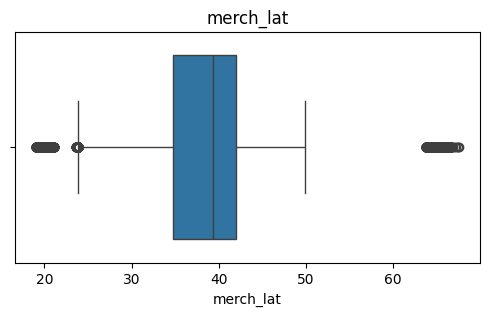

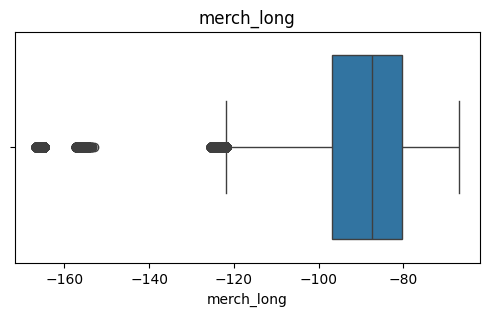

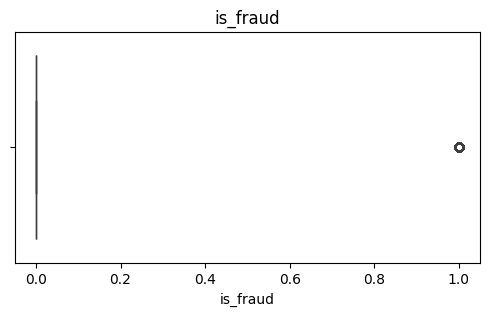

In [119]:
numeric_cols = data_train.select_dtypes(include=['int64', 'float64']).columns

for i in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data_train[i])
    plt.title(i)
    plt.show()

## 1.3. Kiểm tra dữ liệu lặp

In [120]:
data_train.duplicated().sum()

0

## 1.4. Đọc hiểu dữ liệu

In [121]:
data_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [122]:
data_train.shape

(1296675, 22)

In [123]:
data_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [124]:
data_train["city"].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

#### Những cột có thể bỏ:
+ cc_num: Số định danh, số thẻ tín dụng - không ảnh hưởng đến mô hình
+ first: Tên khách hàng - không cần thiết cho model
+ last: Họ khách hàng - không cần thiết cho model và có thể trùng nhau rất nhiều
+ street: Địa chỉ - không ảnh hưởng đến model, đã có cột kinh độ và cột vĩ độ để xác định vị trí
+ city: Thành phố - nhiều giá trị và không ảnh hưởng đến mô hình, đã có cột kinh độ và cột vĩ độ để xác định vị trí
+ state: Bang, tỉnh - không ảnh hưởng đến mô hình, đã có cột kinh độ và cột vĩ độ để xác định vị trí
+ zip: Mã vùng - không ảnh hưởng đến mô hình, đã có cột kinh độ và cột vĩ độ để xác định vị trí
+ trans_num: Mã định danh - không ảnh hưởng đến mô hình
+ unix_time: Số giây tính từ 00:00:00 UTC ngày 1 tháng 1 năm 1970, có thể bỏ vì đã có cột thời gian giao dịch trans_date_trans_time

In [125]:
data_train = data_train.drop(['cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'unix_time'], axis=1)

In [126]:
data_train.head()

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [127]:
data_train.shape

(1296675, 13)

In [128]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  object 
 5   lat                    1296675 non-null  float64
 6   long                   1296675 non-null  float64
 7   city_pop               1296675 non-null  int64  
 8   job                    1296675 non-null  object 
 9   dob                    1296675 non-null  object 
 10  merch_lat              1296675 non-null  float64
 11  merch_long             1296675 non-null  float64
 12  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 128.6+ MB


### Xử lý cột trans_date_trans_time thành các cột khác nhau

In [129]:
data_train['trans_date_trans_time'] = pd.to_datetime(data_train['trans_date_trans_time'])
data_train['year'] = data_train['trans_date_trans_time'].dt.year
data_train['month'] = data_train['trans_date_trans_time'].dt.month
data_train['day'] = data_train['trans_date_trans_time'].dt.day
data_train['hour'] = data_train['trans_date_trans_time'].dt.hour
data_train['minute'] = data_train['trans_date_trans_time'].dt.minute
data_train['second'] = data_train['trans_date_trans_time'].dt.second
data_train.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [130]:
data_train.head()

,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019,1,1,0,0,18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019,1,1,0,0,44
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019,1,1,0,0,51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019,1,1,0,1,16
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019,1,1,0,3,6


In [131]:
data_train['merchant'].nunique()

693

### Số hóa cột merchant

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['merchant_encoded'] = le.fit_transform(data_train['merchant'])
data_train.drop('merchant', axis=1, inplace=True)
data_train

,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,merchant_encoded
0,misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019,1,1,0,0,18,514
1,grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019,1,1,0,0,44,241
2,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019,1,1,0,0,51,390
3,gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019,1,1,0,1,16,360
4,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019,1,1,0,3,6,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020,6,21,12,12,8,499
1296671,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020,6,21,12,12,19,2
1296672,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020,6,21,12,12,32,599
1296673,food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020,6,21,12,13,36,509


### Số hóa cột category

In [133]:
data_train['category'].nunique()

14

In [134]:
data_train['category_encoded'] = le.fit_transform(data_train['category'])
data_train.drop('category', axis=1, inplace=True)
data_train

,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,merchant_encoded,category_encoded
0,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019,1,1,0,0,18,514,8
1,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019,1,1,0,0,44,241,4
2,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019,1,1,0,0,51,390,0
3,45.00,M,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019,1,1,0,1,16,360,2
4,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019,1,1,0,3,6,297,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,M,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020,6,21,12,12,8,499,0
1296671,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020,6,21,12,12,19,2,1
1296672,105.93,M,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020,6,21,12,12,32,599,1
1296673,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020,6,21,12,13,36,509,1


### Số hóa cột gender

In [135]:
data_train['gender_encoded'] = le.fit_transform(data_train['gender'])
data_train.drop('gender', axis=1, inplace=True)
data_train

,amt,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,merchant_encoded,category_encoded,gender_encoded
0,4.97,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019,1,1,0,0,18,514,8,0
1,107.23,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019,1,1,0,0,44,241,4,0
2,220.11,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019,1,1,0,0,51,390,0,1
3,45.00,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019,1,1,0,1,16,360,2,1
4,41.96,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019,1,1,0,3,6,297,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020,6,21,12,12,8,499,0,1
1296671,51.70,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020,6,21,12,12,19,2,1,1
1296672,105.93,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020,6,21,12,12,32,599,1,1
1296673,74.90,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020,6,21,12,13,36,509,1,1


### Số hóa cột job

In [136]:
data_train['job'].nunique()

494

In [137]:
data_train['job_encoded'] = le.fit_transform(data_train['job'])
data_train.drop('job', axis=1, inplace=True)
data_train

,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,merchant_encoded,category_encoded,gender_encoded,job_encoded
0,4.97,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,2019,1,1,0,0,18,514,8,0,370
1,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019,1,1,0,0,44,241,4,0,428
2,220.11,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,2019,1,1,0,0,51,390,0,1,307
3,45.00,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,2019,1,1,0,1,16,360,2,1,328
4,41.96,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,2019,1,1,0,3,6,297,9,1,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,37.7175,-112.4777,258,1961-11-24,36.841266,-111.690765,0,2020,6,21,12,12,8,499,0,1,215
1296671,51.70,39.2667,-77.5101,100,1979-12-11,38.906881,-78.246528,0,2020,6,21,12,12,19,2,1,1,360
1296672,105.93,32.9396,-105.8189,899,1967-08-30,33.619513,-105.130529,0,2020,6,21,12,12,32,599,1,1,308
1296673,74.90,43.3526,-102.5411,1126,1980-08-18,42.788940,-103.241160,0,2020,6,21,12,13,36,509,1,1,485


### Xử lý cột dob để tính tuổi khách hàng tính đến thời điểm giao dịch

In [138]:
data_train['dob'] = pd.to_datetime(data_train['dob'])
data_train['age'] = data_train['year'] - data_train['dob'].dt.year
data_train

,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,merchant_encoded,category_encoded,gender_encoded,job_encoded,age
0,4.97,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,2019,1,1,0,0,18,514,8,0,370,31
1,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019,1,1,0,0,44,241,4,0,428,41
2,220.11,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,2019,1,1,0,0,51,390,0,1,307,57
3,45.00,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,2019,1,1,0,1,16,360,2,1,328,52
4,41.96,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,2019,1,1,0,3,6,297,9,1,116,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,37.7175,-112.4777,258,1961-11-24,36.841266,-111.690765,0,2020,6,21,12,12,8,499,0,1,215,59
1296671,51.70,39.2667,-77.5101,100,1979-12-11,38.906881,-78.246528,0,2020,6,21,12,12,19,2,1,1,360,41
1296672,105.93,32.9396,-105.8189,899,1967-08-30,33.619513,-105.130529,0,2020,6,21,12,12,32,599,1,1,308,53
1296673,74.90,43.3526,-102.5411,1126,1980-08-18,42.788940,-103.241160,0,2020,6,21,12,13,36,509,1,1,485,40


In [139]:
data_train.columns

Index(['amt', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'merchant_encoded', 'category_encoded', 'gender_encoded', 'job_encoded',
       'age'],
      dtype='object')

In [140]:
data_train["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Kiểm tra mức độ tương quan của các cột đến is_fraud

In [141]:
corr_matrix = data_train.corr()
corr_matrix

,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,merchant_encoded,category_encoded,gender_encoded,job_encoded,age
amt,1.000000,-0.001926,-0.000187,0.005818,0.009748,-0.001873,-0.000151,0.219404,0.000842,-0.001748,0.000629,-0.022811,0.000383,0.001405,-0.002633,0.030867,0.001034,-0.000628,-0.009724
lat,-0.001926,1.000000,-0.015533,-0.155730,-0.047982,0.993592,-0.015509,0.001894,0.001274,-0.001072,-0.000138,-0.011508,-0.000243,-0.000221,-0.002266,-0.008660,0.042935,-0.027593,0.047868
long,-0.000187,-0.015533,1.000000,-0.052715,0.029854,-0.015452,0.999120,0.001721,0.000191,-0.001213,0.000031,-0.002290,-0.000825,0.000325,-0.000697,-0.000767,0.050404,-0.002729,-0.030220
city_pop,0.005818,-0.155730,-0.052715,1.000000,0.092545,-0.154781,-0.052687,0.002136,-0.001673,0.000137,0.000159,0.020381,-0.000713,0.000690,0.001911,0.009386,-0.028649,-0.054945,-0.091295
dob,0.009748,-0.047982,0.029854,0.092545,1.000000,-0.047595,0.029777,-0.012391,0.004400,-0.002216,-0.000573,0.173034,0.000706,-0.000778,0.006610,0.003888,-0.006109,0.026660,-0.999527
merch_lat,-0.001873,0.993592,-0.015452,-0.154781,-0.047595,1.000000,-0.015431,0.001741,0.001244,-0.001116,-0.000276,-0.011378,-0.000217,-0.000281,-0.002263,-0.008519,0.042645,-0.027412,0.047480
merch_long,-0.000151,-0.015509,0.999120,-0.052687,0.029777,-0.015431,1.000000,0.001721,0.000184,-0.001197,0.000076,-0.002325,-0.000820,0.000310,-0.000673,-0.000736,0.050350,-0.002727,-0.030142
is_fraud,0.219404,0.001894,0.001721,0.002136,-0.012391,0.001741,0.001721,1.000000,0.003004,-0.012409,0.003848,0.013799,0.001033,0.001095,-0.000536,0.020205,0.007642,-0.000093,0.012453
year,0.000842,0.001274,0.000191,-0.001673,0.004400,0.001244,0.000184,0.003004,1.000000,-0.464879,-0.045759,-0.000811,-0.000170,0.000048,-0.001130,-0.000556,-0.000654,-0.000545,0.021605
month,-0.001748,-0.001072,-0.001213,0.000137,-0.002216,-0.001116,-0.001197,-0.012409,-0.464879,1.000000,0.012434,-0.000356,0.000244,0.000241,0.000453,0.000768,-0.000215,0.000960,-0.009882


In [142]:
corr_matrix['is_fraud'].sort_values(ascending=False)

is_fraud            1.000000
amt                 0.219404
category_encoded    0.020205
hour                0.013799
age                 0.012453
gender_encoded      0.007642
day                 0.003848
year                0.003004
city_pop            0.002136
lat                 0.001894
merch_lat           0.001741
merch_long          0.001721
long                0.001721
second              0.001095
minute              0.001033
job_encoded        -0.000093
merchant_encoded   -0.000536
dob                -0.012391
month              -0.012409
Name: is_fraud, dtype: float64

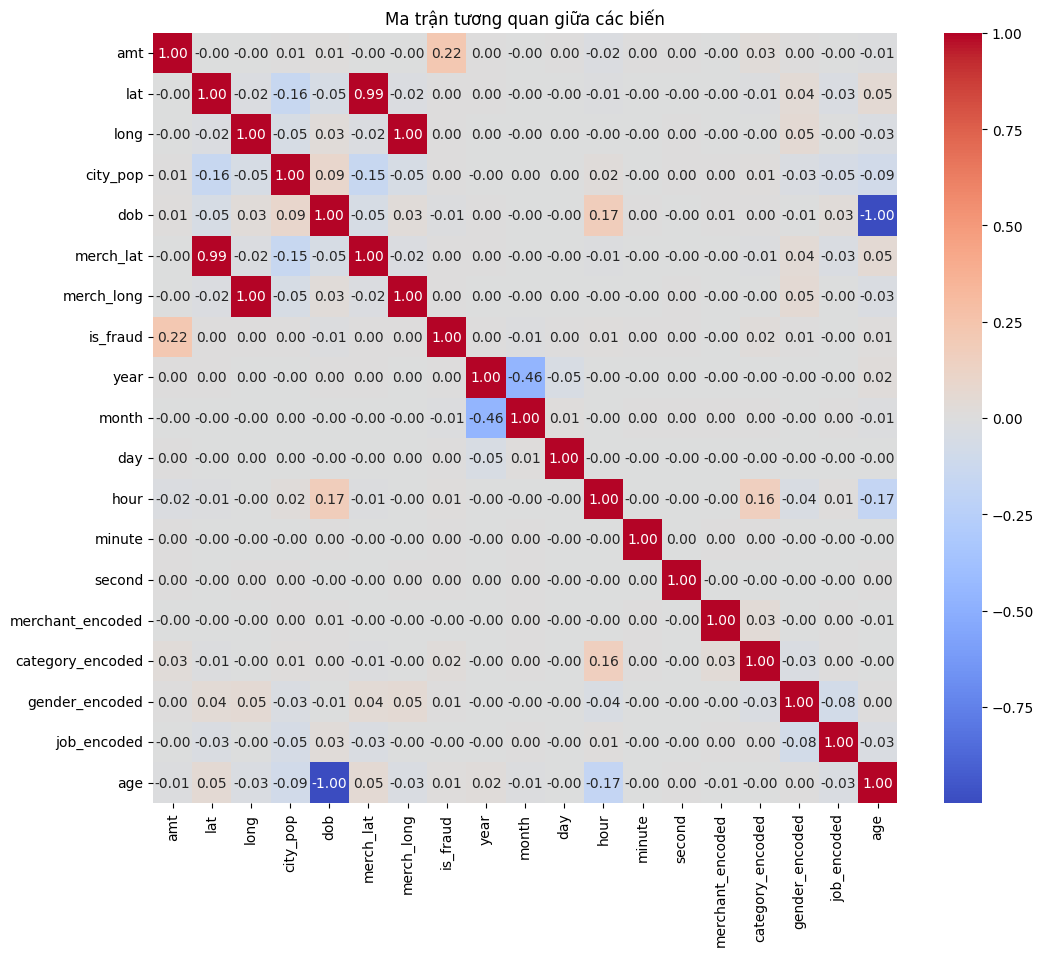

In [143]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

### nhìn vào mức độ tương quan giữa các cột, ta thấy có thể loại bỏ thêm một vài cột:
- lat, long: vì đã có cột merch_lat và merch_long
- minute, second: Mức độ tương quan thấp
- year, month, day: Vì đã tính được độ tuổi của khách hàng tại thời điểm giao dịch

In [144]:
data_train = data_train.drop(['lat', 'long', 'minute', 'second', 'year', 'month', 'day'], axis=1)

In [145]:
data_train.head()

,amt,city_pop,dob,merch_lat,merch_long,is_fraud,hour,merchant_encoded,category_encoded,gender_encoded,job_encoded,age
0,4.97,3495,1988-03-09,36.011293,-82.048315,0,0,514,8,0,370,31
1,107.23,149,1978-06-21,49.159047,-118.186462,0,0,241,4,0,428,41
2,220.11,4154,1962-01-19,43.150704,-112.154481,0,0,390,0,1,307,57
3,45.00,1939,1967-01-12,47.034331,-112.561071,0,0,360,2,1,328,52
4,41.96,99,1986-03-28,38.674999,-78.632459,0,0,297,9,1,116,33


In [146]:
data_train = data_train.drop(['dob'], axis=1)
data_train

,amt,city_pop,merch_lat,merch_long,is_fraud,hour,merchant_encoded,category_encoded,gender_encoded,job_encoded,age
0,4.97,3495,36.011293,-82.048315,0,0,514,8,0,370,31
1,107.23,149,49.159047,-118.186462,0,0,241,4,0,428,41
2,220.11,4154,43.150704,-112.154481,0,0,390,0,1,307,57
3,45.00,1939,47.034331,-112.561071,0,0,360,2,1,328,52
4,41.96,99,38.674999,-78.632459,0,0,297,9,1,116,33
...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,258,36.841266,-111.690765,0,12,499,0,1,215,59
1296671,51.70,100,38.906881,-78.246528,0,12,2,1,1,360,41
1296672,105.93,899,33.619513,-105.130529,0,12,599,1,1,308,53
1296673,74.90,1126,42.788940,-103.241160,0,12,509,1,1,485,40


# 2. Xây dựng mô hình

## 2.1. Mô hình Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
X = data_train.drop('is_fraud', axis=1)
y = data_train['is_fraud']

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

X, y = over.fit_resample(X, y)
X, y = under.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

print(f"Điểm số của mỗi fold: {scores}")
print(f"Điểm số trung bình: {scores.mean()}")
print(f"Độ lệch chuẩn: {scores.std()}")

In [ ]:
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_val_pred))

print("ROC-AUC score trên tập Validation:", roc_auc_score(y_val, y_val_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.97      0.79      0.87      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.90      0.94    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC score trên tập Validation: 0.989599068170108


In [ ]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Mô hình LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
lr = LogisticRegression(
    C=0.1,
    class_weight='balanced',
    max_iter=500,
    random_state=42
    )
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_val)
y_prob = lr.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_val, y_prob))

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. Đánh giá mô hình trên tập test

In [151]:
data_test = pd.read_csv("./fraudTest.csv")
data_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [152]:
data_test = data_test.drop('Unnamed: 0', axis=1)

In [153]:
data_test = data_test.drop(['cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'unix_time'], axis=1)

In [156]:
data_test['trans_date_trans_time'] = pd.to_datetime(data_test['trans_date_trans_time'])
data_test['year'] = data_test['trans_date_trans_time'].dt.year
data_test['month'] = data_test['trans_date_trans_time'].dt.month
data_test['day'] = data_test['trans_date_trans_time'].dt.day
data_test['hour'] = data_test['trans_date_trans_time'].dt.hour
data_test['minute'] = data_test['trans_date_trans_time'].dt.minute
data_test['second'] = data_test['trans_date_trans_time'].dt.second
data_test.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [157]:
data_test['merchant_encoded'] = le.fit_transform(data_test['merchant'])
data_test.drop('merchant', axis=1, inplace=True)

In [158]:
data_test['category_encoded'] = le.fit_transform(data_test['category'])
data_test.drop('category', axis=1, inplace=True)

In [159]:
data_test['gender_encoded'] = le.fit_transform(data_test['gender'])
data_test.drop('gender', axis=1, inplace=True)

In [160]:
data_test['job_encoded'] = le.fit_transform(data_test['job'])
data_test.drop('job', axis=1, inplace=True)

In [161]:
data_test['dob'] = pd.to_datetime(data_test['dob'])
data_test['age'] = data_test['year'] - data_test['dob'].dt.year

In [162]:
data_test = data_test.drop(['lat', 'long', 'minute', 'second', 'year', 'month', 'day'], axis=1)

In [163]:
data_test = data_test.drop(['dob'], axis=1)

In [164]:
X_test = data_test.drop('is_fraud', axis=1)
y_test = data_test['is_fraud']

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

print("Kết quả trên tập Test:")
print(classification_report(y_test, y_test_pred))
print("ROC-AUC trên tập Test:", roc_auc_score(y_test, y_test_proba))

Kết quả trên tập Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.76      0.84      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.88      0.92    555719
weighted avg       1.00      1.00      1.00    555719

ROC-AUC trên tập Test: 0.9799612979856271
